# Part I - (Dataset Exploration Title)
## by Charles Nikoro

## Introduction

In this document, I will analyze loan data from Prosper (a peear-to-peer lending marketplace) comprising approximately 113937 records with the aim of investigating the possible factors that can affect the outcome of a loan's status.

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load data and check the first five records
# make sure the dates are correctly parsed

loans = pd.read_csv('../dataset/prosperLoanData.csv', parse_dates=['ListingCreationDate',
    'LoanOriginationDate', 'ClosedDate', 'DateCreditPulled'])

loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [27]:
print("Shape of the dataframe:", loans.shape)
print("Number of duplicate records:", loans.duplicated().sum())

Shape of the dataframe: (113937, 81)
Number of duplicate records: 0


In [28]:
# get listings that originated after July 2009

loans = loans.query("ListingCreationDate > '2009-07-31'").copy()

print("Shape of the dataframe:", loans.shape)

Shape of the dataframe: (84685, 81)


In [29]:
# columns without null values

columns_without_null = loans.isna().sum()==0
loans.isna().sum()[columns_without_null].index

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpe

In [30]:
# columns with null values

columns_with_null = loans.isna().sum()>0
loans.isna().sum()[columns_with_null].index

Index(['CreditGrade', 'ClosedDate', 'Occupation', 'EmploymentStatusDuration',
       'GroupKey', 'DebtToIncomeRatio', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

In [31]:
# columns and their data types

dtypes = ['bool', 'int64', 'float64', 'object']

for dtype in dtypes:
    print(f"{dtype}\n{set(loans.dtypes[loans.dtypes == dtype].index)}\n")

bool
{'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable'}

int64
{'ListingNumber', 'LoanMonthsSinceOrigination', 'OpenRevolvingAccounts', 'LoanOriginalAmount', 'Investors', 'LoanCurrentDaysDelinquent', 'InvestmentFromFriendsCount', 'LoanNumber', 'ListingCategory (numeric)', 'Recommendations', 'Term'}

float64
{'EstimatedReturn', 'EmploymentStatusDuration', 'LP_InterestandFees', 'TotalProsperPaymentsBilled', 'CurrentDelinquencies', 'TradesOpenedLast6Months', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'LP_CollectionFees', 'DebtToIncomeRatio', 'DelinquenciesLast7Years', 'InquiriesLast6Months', 'BankcardUtilization', 'OpenCreditLines', 'AvailableBankcardCredit', 'BorrowerAPR', 'ProsperPaymentsOneMonthPlusLate', 'ScorexChangeAtTimeOfListing', 'LP_GrossPrincipalLoss', 'ProsperPrincipalBorrowed', 'PercentFunded', 'TotalCreditLinespast7years', 'LenderYield', 'LoanFirstDefaultedCycleNumber', 'LP_CustomerPrincipalPayments', 'BorrowerRate', 'PublicRecordsLast10Years', 'Estima

In [32]:
# summary statistics

loans.loc[:, 'Term':].describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,...,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.000000,84685.00000,84685.000000,84685.000000,84685.000000
mean,42.499002,0.226740,0.196091,0.186086,0.168830,0.080339,0.096092,4.071016,5.945398,3.313503,...,-54.642423,-8.196423,376.183526,367.843459,7.637875,0.998094,0.01737,0.007888,4.272890,68.101116
std,11.648297,0.079892,0.074609,0.074609,0.068409,0.046728,0.030379,1.672839,2.375464,4.367191,...,59.741420,75.160646,1721.532039,1701.019897,119.168606,0.020762,0.18713,0.108924,116.866606,95.052548
min,12.000000,0.049350,0.040000,0.030000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,...,-589.950000,-4865.080000,-94.200000,-504.410000,0.000000,0.700000,0.00000,0.000000,0.000000,1.000000
25%,36.000000,0.163610,0.135900,0.125900,0.116600,0.042400,0.074550,3.000000,4.000000,1.000000,...,-72.320000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000
50%,36.000000,0.219450,0.187500,0.177500,0.161500,0.072400,0.092110,4.000000,6.000000,1.000000,...,-34.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,31.000000
75%,60.000000,0.292540,0.257400,0.247400,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000,...,-14.270000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,97.000000
max,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,...,3.010000,0.000000,25000.000000,25000.000000,7780.030000,1.012500,19.00000,9.000000,11000.000000,1189.000000


In [112]:
loans['ListingCategory (numeric)'].value_counts().sort_index(ascending=False)

20      771
19      768
18      885
17       52
16      304
15     1522
14      876
13     1996
12       59
11      217
10       91
9        85
8       199
7     10494
6      2572
5       756
4      2395
3      7189
2      7433
1     58308
0     16965
Name: ListingCategory (numeric), dtype: int64

In [83]:
# make ListingCategory (numeric) and Term of categorical types

category = pd.api.types.CategoricalDtype(categories=range(1,18), ordered=False)

loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].astype(category)

category = pd.api.types.CategoricalDtype(categories=[12, 36, 60], ordered=True)

loans['Term'] = loans.Term.astype(category)

# LoanStatus would be made an ordered categorical variable

category = ['Cancelled', 'Current', 'FinalPaymentInProgress', 'Completed',
 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (> 120 days)', 
'Defaulted', 'Chargedoff']

category = pd.api.types.CategoricalDtype(categories=category, ordered=True)
loans.LoanStatus = loans.LoanStatus.astype(category)

In [23]:
loans[['BorrowerRate', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments',
 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
 'EstimatedEffectiveYield', 'LenderYield', 'EstimatedLoss', 'BorrowerAPR']].corr().iloc[:,:4]

,BorrowerRate,LP_InterestandFees,LP_ServiceFees,MonthlyLoanPayment
BorrowerRate,1.000000,0.238708,0.098069,-0.332256
LP_InterestandFees,0.238708,1.000000,-0.873865,0.270631
LP_ServiceFees,0.098069,-0.873865,1.000000,-0.395031
MonthlyLoanPayment,-0.332256,0.270631,-0.395031,1.000000
LP_CustomerPrincipalPayments,-0.088165,0.427626,-0.539776,0.295066
LP_CustomerPayments,-0.011341,0.634170,-0.696243,0.325021
LoanFirstDefaultedCycleNumber,-0.085495,0.544498,-0.488962,-0.039755
OnTimeProsperPayments,0.002190,0.026656,-0.022364,0.018842
ProsperPrincipalBorrowed,-0.220912,0.031844,-0.128090,0.330926
ProsperPrincipalOutstanding,-0.097319,0.020294,-0.058596,0.175039


In [157]:

data[['BorrowerRate', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments',
 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
 'EstimatedEffectiveYield', 'LenderYield', 'EstimatedLoss', 'BorrowerAPR']].corr().iloc[:,4:7]




,LP_CustomerPrincipalPayments,LP_CustomerPayments,LoanFirstDefaultedCycleNumber
BorrowerRate,-0.153722,-0.081055,-0.172936
LP_InterestandFees,0.518203,0.687189,0.413346
LP_ServiceFees,-0.576933,-0.703125,-0.383058
MonthlyLoanPayment,0.387200,0.425351,-0.010950
LP_CustomerPrincipalPayments,1.000000,0.977430,0.482596
LP_CustomerPayments,0.977430,1.000000,0.484110
LoanFirstDefaultedCycleNumber,0.482596,0.484110,1.000000
OnTimeProsperPayments,0.016315,0.024061,0.006332
ProsperPrincipalBorrowed,0.103585,0.101672,-0.093558
ProsperPrincipalOutstanding,0.012278,0.019624,-0.050007


In [158]:
data[['BorrowerRate', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments',
 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
 'EstimatedEffectiveYield', 'LenderYield', 'EstimatedLoss', 'BorrowerAPR']].corr().iloc[:,7:10]

,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
BorrowerRate,-0.006954,-0.206461,-0.039643
LP_InterestandFees,0.041305,0.047917,0.037224
LP_ServiceFees,-0.057433,-0.138998,-0.064392
MonthlyLoanPayment,-0.034718,0.339724,0.018277
LP_CustomerPrincipalPayments,0.016315,0.103585,0.012278
LP_CustomerPayments,0.024061,0.101672,0.019624
LoanFirstDefaultedCycleNumber,0.006332,-0.093558,-0.050007
OnTimeProsperPayments,1.000000,0.367936,0.380652
ProsperPrincipalBorrowed,0.367936,1.000000,0.498351
ProsperPrincipalOutstanding,0.380652,0.498351,1.000000


In [159]:
data[['BorrowerRate', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments',
 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
 'EstimatedEffectiveYield', 'LenderYield', 'EstimatedLoss', 'BorrowerAPR']].corr().iloc[:,10:13]

,TotalTrades,TradesNeverDelinquent (percentage),EstimatedEffectiveYield
BorrowerRate,-0.048211,-0.261189,0.895282
LP_InterestandFees,0.033781,-0.008248,0.252936
LP_ServiceFees,-0.048738,-0.067241,0.058309
MonthlyLoanPayment,0.166256,0.220534,-0.251588
LP_CustomerPrincipalPayments,0.026646,0.067109,-0.086423
LP_CustomerPayments,0.031083,0.055043,-0.006059
LoanFirstDefaultedCycleNumber,0.008078,-0.039631,-0.182887
OnTimeProsperPayments,0.075539,0.012788,-0.063883
ProsperPrincipalBorrowed,0.160654,0.197618,-0.143350
ProsperPrincipalOutstanding,0.073580,0.052159,-0.050863


In [162]:
data[['BorrowerRate', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'LP_CustomerPrincipalPayments', 'LP_CustomerPayments',
 'LoanFirstDefaultedCycleNumber', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
 'EstimatedEffectiveYield', 'LenderYield', 'EstimatedLoss', 'BorrowerAPR']].corr().iloc[:,13:19]

,LenderYield,EstimatedLoss,BorrowerAPR
BorrowerRate,0.999211,0.945297,0.989587
LP_InterestandFees,0.201162,0.107987,0.169713
LP_ServiceFees,0.097854,0.197471,0.116966
MonthlyLoanPayment,-0.244214,-0.328703,-0.226627
LP_CustomerPrincipalPayments,-0.151563,-0.133549,-0.180433
LP_CustomerPayments,-0.079052,-0.085261,-0.111343
LoanFirstDefaultedCycleNumber,-0.170825,-0.078386,-0.185956
OnTimeProsperPayments,-0.006611,-0.026965,0.006996
ProsperPrincipalBorrowed,-0.206725,-0.205754,-0.206209
ProsperPrincipalOutstanding,-0.039460,-0.078665,-0.032986


### What is the structure of your dataset?

The dataset comprises 113937 observations and 81 variables some of which contains null values. For some of them, it means that there are no existing records for the borrower concerned. For instance, according to the [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0), a borrower with a null `TotalProsperLoans` value doesn't have prior loans. The categorical variables includes `ListingCategory (numeric)`, `LoanStatus`, `ProsperScore`, and `Term`. `ListingCategory (numeric)` is encoded as follows: 0 - Not Available, 1 - Debt Consolidation, 2 - Home 
Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic 
Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - 
Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans. `ProsperScore` include values from 1 to 11 where 11 means a very low risk.

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out the features that will help predict the outcome of a borrower's loan status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect that the `LoanCurrentDaysDelinquent` variable might be an important factor to consider to determine if a borrower will default or not. Other factors I also intend to investigate includes the total number of prior loans (`TotalProsperLoans`), term of each loan (`Term`), principal outstanding of the borrower (`ProsperPrincipalOutstanding`), listing category (`ListingCategory (numeric)`), average credit score (`(CreditScoreRangeLower + CreditScoreRangeUpper) / 2`), the total number of on time payments made on prior loans (`OnTimeProsperPayments`), stated monthly income of the borrower (`StatedMonthlyIncome`) and whether they are verifiable or not (`IncomeVerifiable`), and the number of times the borrower was more than one month late on prior loans (`ProsperPaymentsOneMonthPlusLate`). Two other interesting variables I would like to investigate are `BorrowerAPR`and `EstimatedLoss`.


## Univariate Exploration

I'll begin by looking at the distribution of the main variable of interest – `LoanStatus`.

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


##### Which loan status has the highest frequency count?

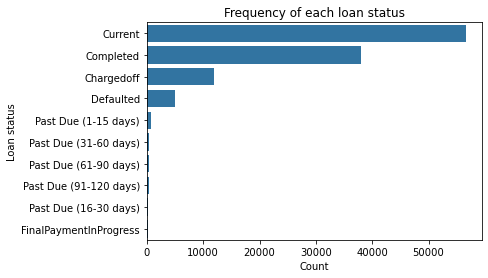

In [87]:
# plot distribution of LoanStatus

sns.countplot(data=loans, y='LoanStatus', order=loans.LoanStatus.value_counts().index, color=sns.color_palette()[0])
plt.xlabel('Count')
plt.ylabel('Loan status')
plt.title('Frequency of each loan status')
plt.show()

From the above chart, we can see that there are more borrowers with a current loan status while none of them have their loans cancelled or past due for more than 120 days. We will therefore remove these options from the list of values of this variable.

In [85]:
category = ['Current', 'FinalPaymentInProgress', 'Completed',
 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
'Past Due (61-90 days)', 'Past Due (91-120 days)', 
'Defaulted', 'Chargedoff']

category = pd.api.types.CategoricalDtype(categories=category, ordered=True)
loans.LoanStatus = loans.LoanStatus.astype(category)

loans.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

Next, let's take a look at the distribution of the stated monthly income. First, we will define two functions for computing the number of bins we need for the plot and for performing a log transformation of the `StatedMonthlyIncome` variable because of its large values.

In [36]:
def get_bin_counts(series):
    """
       computes number of bins needed to plot the histogram of series
       using Freedman Diaconis algorithm
       
       :param series: quantitative pandas series
       :return integer: the number of bins
    """
    bin_width = 2*((series.quantile(0.75)-series.quantile(0.25))/(np.power(series.shape[0],1/3)))
    return ((series.max()-series.min())//bin_width).astype(int)

def log_trans(number):
    '''
        computes the log of a number

        :param integer: number whose log we want to compute
        :return float: log of the number
    '''

    if not number: # return 0 if number is 0
        return 0
    return math.log10(number)

##### What is the distribution of the Stated Monthly Income of the borrowers? Do most of them have documents to support their stated income?

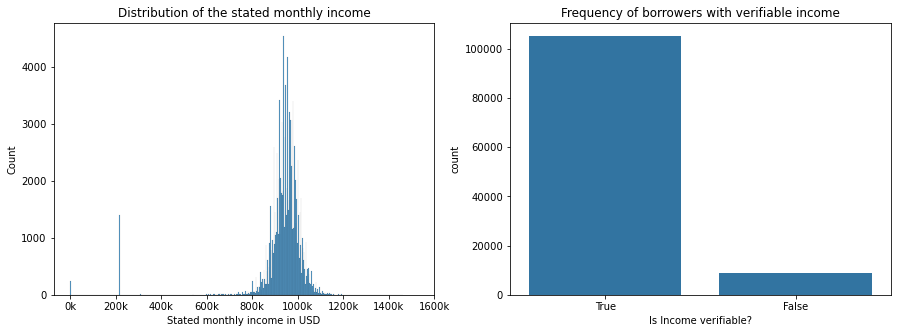

In [56]:
# distribution of monthly income

log_of_income = loans.StatedMonthlyIncome.apply(log_trans) # perform log transform on the monthly income

fig,axs = plt.subplots(1,2,figsize=(15,5))

xticklabels = ['0k', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k', '1600k']
xticks = np.arange(log_of_income.min(), log_of_income.max()+1)

ax1 = sns.histplot(log_of_income, bins = get_bin_counts(log_of_income), ax=axs[0])
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set(xlabel='Stated monthly income in USD',
        title='Distribution of the stated monthly income')

# distribution of borrowers with verifiable income

ax2 = sns.countplot(data=loans, x='IncomeVerifiable', color=sns.color_palette()[0], order=loans.IncomeVerifiable.value_counts().index, ax=axs[1])
ax2.set(xlabel="Is Income verifiable?",
        title="Frequency of borrowers with verifiable income")

plt.show()

The stated monthly income follows a roughly normal distribution. As we can also see, most of the borrowers have supporting documents to verify their income. 

##### What is the distribution of the total number of loans? Which listing category and term did most of the borrowers decide to opt for?

Since the total number of Prosper loans taken by each borrower is discrete with a fairly small range of values, we can use a count plot to get a sense of its distribution. The `TotalProsperLoans` variable also contains null values which means that the borrower had no prior prosper loan. We will replace these values with 0.

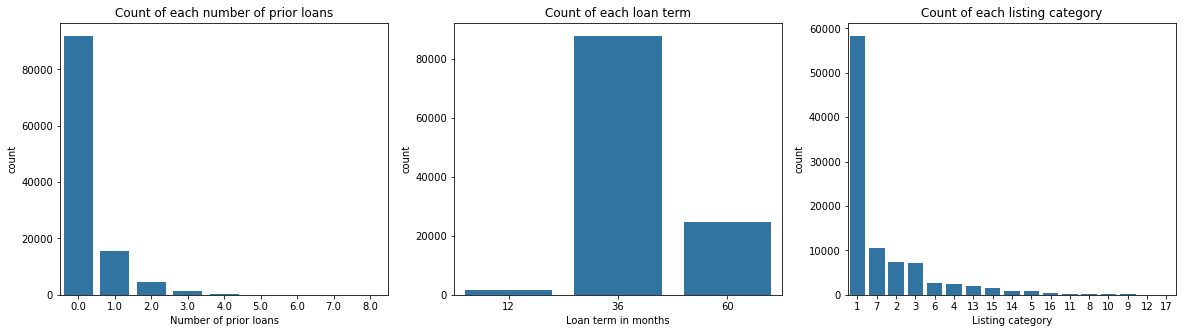

In [57]:
# Distribution of TotalProsperLoans, Term, and ListingCategory

fig, axes = plt.subplots(1,3, figsize=(20,5))

loans.TotalProsperLoans = loans.TotalProsperLoans.fillna(0)

ax1 = sns.countplot(data=loans, x='TotalProsperLoans', color=sns.color_palette()[0], ax=axes[0], order=loans.TotalProsperLoans.value_counts().index)
ax1.set(xlabel="Number of prior loans",
        title="Count of each number of prior loans")

ax2 = sns.countplot(data=loans, x='Term', color=sns.color_palette()[0], ax=axes[1])
ax2.set(xlabel="Loan term in months",
        title='Count of each loan term')

ax3 = sns.countplot(data=loans, x='ListingCategory (numeric)', color=sns.color_palette()[0], ax=axes[2],
 order=loans['ListingCategory (numeric)'].value_counts().index)

ax3.set(xlabel="Listing category",
        title="Count of each listing category")


plt.show()

From the plots, most borrowers had no prior Prosper loans. Also most of their loans were for a 3-year term, and most of them took loans for debt consolidation which is represented as 1 in the `ListCategory (numeric)` variable.

##### What is the distribution of the number of days the borrowers were delinquent on a loan? Is it roughly the same as the number of times the borrower was more than one month late on prior loans?

Because the interquantile range of `LoanCurrentDaysDelinquent` and `ProsperPaymentsOneMonthPlusLate` are both 0, we can't use the Freedman Diaconis algorithm that `get_bin_counts()` is based on to compute their optimal bin size to use. We will have to manually compute their bin edges. The `ProsperPaymentsOneMonthPLusLate` variable also contains null values which implies that the borrower didn't have any prior loans. We will replace these values with 0. We will also plot the y-axis on a log scale in order to make every bin visible.

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# distribution of LoanCurrentDaysDelinquent

bin_edges = np.arange(loans.LoanCurrentDaysDelinquent.min(), loans.LoanCurrentDaysDelinquent.max()+100, 50)
ax1_ticks = [10, 100, 1000, 10000, 100000]
ax1_labels = [str(i) for i in ax1_ticks]

ax1 = sns.histplot(data=loans, x='LoanCurrentDaysDelinquent', bins=bin_edges, ax=axes[0])
ax1.set_yscale('log')
ax1.set_yticks(ticks=ax1_ticks)
ax1.set_yticklabels(ax1_labels)
ax1.set(xlabel="Number of days delinquent on current loan",
        title="Distribution of number of days delinquent on current loan")

# distribution of ProsperPaymentsOneMonthPlusLate
loans.ProsperPaymentsOneMonthPlusLate = loans.ProsperPaymentsOneMonthPlusLate.fillna(0)

bin_edges = np.arange(loans.ProsperPaymentsOneMonthPlusLate.min(), loans.ProsperPaymentsOneMonthPlusLate.max()+1)
ax2_ticks = [3, 30, 300, 3000, 30000, 300000]
ax2_labels = [str(i) for i in ax2_ticks]

ax2 = sns.histplot(x=loans.ProsperPaymentsOneMonthPlusLate, bins=bin_edges, ax=axes[1])
ax2.set_yscale('log')
ax2.set_yticks(ticks=ax2_ticks)
ax2.set_yticklabels(ax2_labels)
ax2.set(xlabel="Payments that were a month or more late",
        title="Distribution of payments that were a month or more late")
        
plt.show()


In [90]:
data2 = loans.query("LoanStatus != 'Current'")

data2.shape

(57361, 81)

In [91]:
data = data2.query("TotalProsperLoans > 0").copy()

data.shape

(11204, 81)

In [94]:
category = ['FinalPaymentInProgress', 'Completed',
 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
'Past Due (61-90 days)', 'Past Due (91-120 days)', 
'Defaulted', 'Chargedoff']

category = pd.api.types.CategoricalDtype(categories=category, ordered=True)
data.LoanStatus = data.LoanStatus.astype(category)

data.LoanStatus.value_counts()

Completed                 8084
Chargedoff                1977
Defaulted                  477
Past Due (1-15 days)       249
Past Due (61-90 days)       98
Past Due (91-120 days)      93
Past Due (31-60 days)       86
Past Due (16-30 days)       74
FinalPaymentInProgress      61
Name: LoanStatus, dtype: int64

In [92]:
data.LoanStatus.value_counts()

Completed                 8084
Chargedoff                1977
Defaulted                  477
Past Due (1-15 days)       249
Past Due (61-90 days)       98
Past Due (91-120 days)      93
Past Due (31-60 days)       86
Past Due (16-30 days)       74
FinalPaymentInProgress      61
Current                      0
Name: LoanStatus, dtype: int64

The distribution of both variables are skewed to the right. Also, in both cases, there are more borrowers in the first bin. This is because most borrowers do not have prior loans.



##### What is the distribution of the percentage of on time payments made?

The `OnTimeProsperPayments` variable has null values that implies that the borrower concerned doesn't have any prior loans. We will replace the null value with 0. We will also plot the y-axis on a log scale in other to make every bin visible.

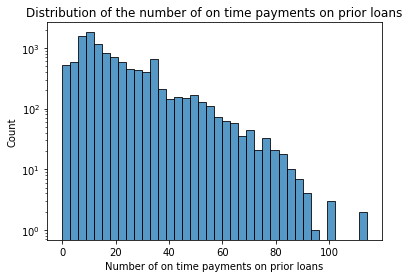

In [95]:
# compute the percentages of On time payments
data["OnTimeProsperPayments"] = data.OnTimeProsperPayments.fillna(0)

bin_edges = np.arange(0, data.OnTimeProsperPayments.max()+1, 3)

sns.histplot(data=data, x='OnTimeProsperPayments', bins=bin_edges)
plt.yscale('log')

#plt.yticks([20,200,2000,20000], ['20', '200', '2000', '20000'])
plt.xlabel('Number of on time payments on prior loans')
plt.title('Distribution of the number of on time payments on prior loans')

plt.show();

The distribution is unimodal and skewed to the right with peak around 0 because most borrowers didn't have prior loans.

##### What is the distribution of `ProsperPrincipalOutstanding`? What is also the distribution of the average credit score?

As with the `OnTimeProsperPayments` variable, `ProsperPrincipalOutstanding`, `CreditScoreRangeLower`, and `CreditScoreRangeUpper` also contains null values that mean the borrowers concerned didn't have any prior loans. We will also replace them with 0. A log scale will be used on the y-axis to make the bins of the distribution of `ProsperPrincipalOutstanding` visible.

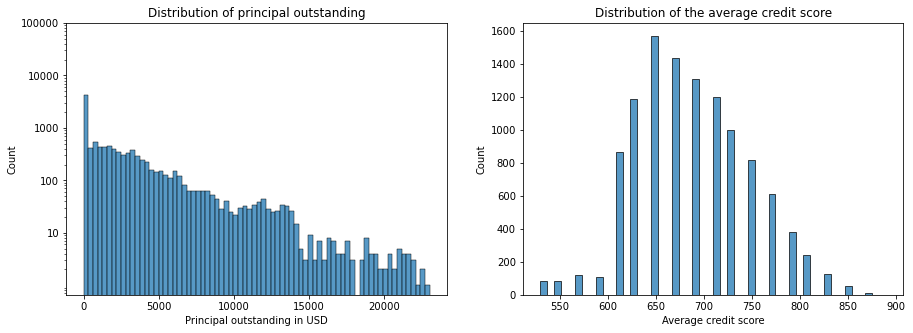

In [96]:
# distribution of ProsperPrincipalOutstanding

fig, axes = plt.subplots(1,2, figsize=(15,5))

bin_size = get_bin_counts(data.ProsperPrincipalOutstanding)

loans.ProsperPrincipalOutstanding = data.ProsperPrincipalOutstanding.fillna(0)

ax1 = sns.histplot(data=data, x='ProsperPrincipalOutstanding', bins=bin_size, ax=axes[0]) 
ax1.set_yscale('log')
y_ticks = [10, 100, 1000, 10000, 100000]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels([str(i) for i in y_ticks])
ax1.set(xlabel="Principal outstanding in USD",
       title="Distribution of principal outstanding")

data['AverageCreditScore'] = (data.CreditScoreRangeUpper.fillna(0) + loans.CreditScoreRangeLower.fillna(0))/2
data.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True)

ax2 = sns.histplot(data=data, x='AverageCreditScore', bins=get_bin_counts(data.AverageCreditScore), ax=axes[1])
ax2.set(xlabel='Average credit score',
        title='Distribution of the average credit score')

plt.show()

The distribution is unimodal with a peak at the first bin because, as we have already seen, most borrowers don't have prior loans. The distribution seems to decrease with an increase in the principal outstanding which suggests that there are less borrowers with a lot of outstanding than those with few. On the other hand, the average credit score roughly follows a normal distribution with a peak around 700.

##### What is the distribution of annual percentage rate?

The `BorrowerAPR` variable has some missing values which we can't account for at the moment. Let's see the percentage of null values that it has.

In [97]:
loans.BorrowerAPR.isna().sum()/loans.BorrowerAPR.shape[0]

0.0002194195037608503

As we can see, it is not significant. Therefore, it is okay to replace them with the mean value.

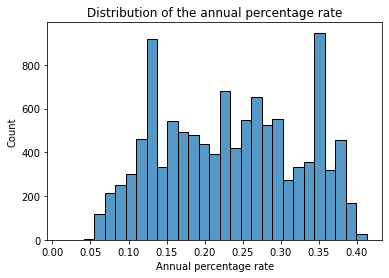

In [98]:
# distribution of the PercentFunded
data.BorrowerAPR = data.BorrowerAPR.fillna(data.BorrowerAPR.mean())

sns.histplot(data=data, x='BorrowerAPR', bins=get_bin_counts(data.BorrowerAPR))
plt.xlabel('Annual percentage rate')
plt.title('Distribution of the annual percentage rate')
plt.show();

This distribution is also unimodal with most borrowers having a rating of about 35%.

<AxesSubplot:xlabel='EstimatedLoss', ylabel='Density'>

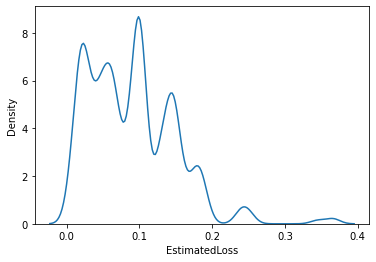

In [99]:
sns.kdeplot(data=data, x='EstimatedLoss')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I created a new columns (`AverageCreditScore`) in the dataframe which is the average credit score of `CreditScoreRangeLower` and `CreditScoreRangeUpper`. Both `CreditScoreRangeLower`, `CreditScoreRangeUpper` were then dropped from the dataframe. I did a log transformation of `MonthlyStatedIncome` due to its large range of values, and also plotted the distributions of `LoanCurrentDaysDelinquent`, `ProsperPaymentsOneMonthPlusLate`, `ProsperPrincipalOutstanding`, and `AverageCreditScore` on a log scale for their y-axis to make their bins visible. I also replaced the null values in the variables with 0 since a null value in these cases means the borrower had no prior loan. The `BorrowerAPR` variable also contains null values which wasn't accounted for in the data dictionary. I therefore replaced them with the mean since the percentage of null values it contains is not significant.

 Most of the loans in the dataset are current with very few of them been cancelled as shown in the bar plot of `LoanStatus`. The stated monthly income follows a normal distribution and the bar plot of the `IncomeVerifiable` variable shows that most of them can be verified. The distribution of the number of days borrowers were delinquent on their current loan, payments that were a month or more late, and the principal outstanding are unimodal and roughly skewed to the right with a peak between 0 and 30 days for `LoanCurrentDaysDelinquent`, 1 and 3 months for `ProsperPaymentsOneMonthPlusLate`, and 0 and 700 dollars for `ProsperPrincipalOutstanding` respectively. The number of on time payments is also unimodal and right skewed with a peak at 0 because most borrowers did not have prior loans. The average credit score follows a normal distribution with a peak around 700. The distribution of the `BorrowerAPR` variable is unimodal with a peak around 35%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I noticed that there were no borrowers with a `Past Due(> 120 days)` status. I decided to remove this option from the list of possible values for the `LoanStatus` variable, since it won't be useful in our current analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### Is there a relationship between average credit score and principal outstanding balance?

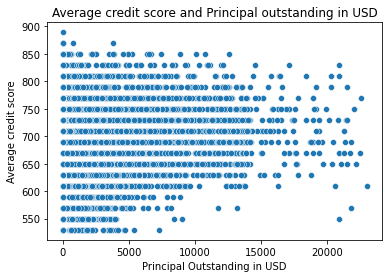

In [100]:
# we will investigate this with a scatter plot

sns.scatterplot(data=data, x='ProsperPrincipalOutstanding', y='AverageCreditScore')
plt.xlabel('Principal Outstanding in USD')
plt.ylabel('Average credit score')
plt.title('Average credit score and Principal outstanding in USD')
plt.show()

There seems to be little or no relationship between the average credit score and the principal outstanding balance. There is one rather extreme value in the plot – the case where some borrowers have an average of 0 credit score and a 0 principal outstanding balance. Their loan might have been cancelled.

##### Which loan status has the most principal outstanding?

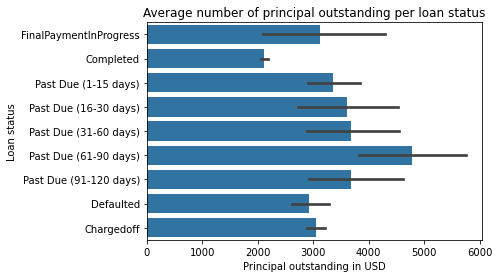

In [101]:
# we will investigate this with a bar plot with the mean of the prosper principal outstanding on the x-axis

sns.barplot(data=data, x='ProsperPrincipalOutstanding', y='LoanStatus', color=sns.color_palette()[0])
plt.xlabel("Principal outstanding in USD")
plt.ylabel("Loan status")
plt.title("Average number of principal outstanding per loan status")
plt.show()

It turns out that the `Past Due (61-90 days)` status has the largest principal outstanding. As we suspected above, borrowers whose loans were cancelled have no principal outstanding.

##### Is there a relationship between average credit score and number of on time payments for prior loans?

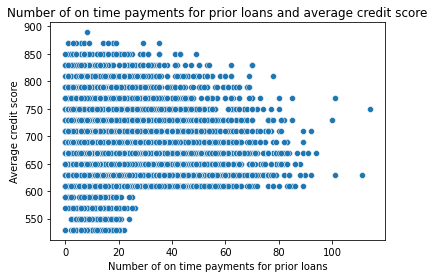

In [102]:
# We will investigate this with a scatter plot

sns.scatterplot(data=data, x='OnTimeProsperPayments', y='AverageCreditScore')
plt.xlabel("Number of on time payments for prior loans")
plt.ylabel("Average credit score")
plt.title("Number of on time payments for prior loans and average credit score")
plt.show()

From the above plot, there is no relationship between the average credit score and the number of on time payments for prior loans.

##### Which loan status has the least average stated monthly income?

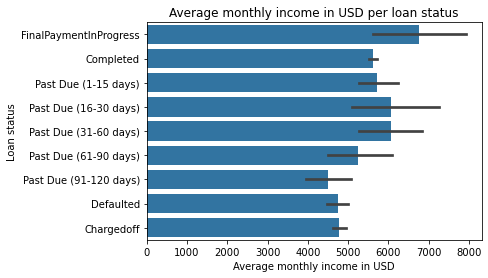

In [103]:
# we will investigate this with a bar plot with the mean of StatedMonthlyIncome on the x-axis

sns.barplot(data=data, x='StatedMonthlyIncome', y='LoanStatus', color=sns.color_palette()[0])
plt.xlabel("Average monthly income in USD")
plt.ylabel("Loan status")
plt.title("Average monthly income in USD per loan status")
plt.show()

It looks like cancelled loans have the lowest stated monthly income on average. This is followed with loans that were defaulted and charged off. This seems to suggest that the monthly income of the borrower might affect the outcome of the loan.

##### Are borrowers with verifiable income less likely to default?

We will investigate this with a clustered bar plot.

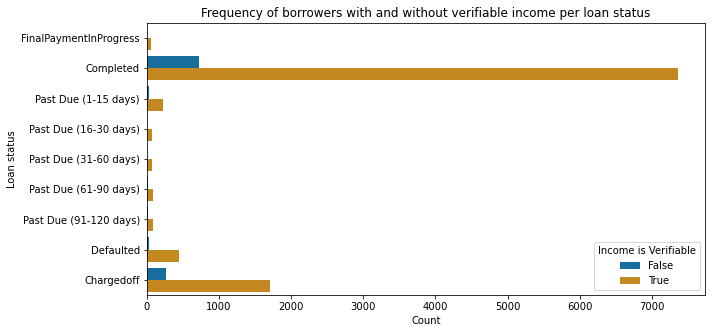

In [104]:
# bar plot of showing LoanStatus categorized according to whether borrowers have verifiable income.

plt.figure(figsize=(10,5))

sns.countplot(data=data, y='LoanStatus', hue='IncomeVerifiable', palette='colorblind')
plt.xlabel("Count")
plt.ylabel("Loan status")
plt.title("Frequency of borrowers with and without verifiable income per loan status")
plt.legend(title='Income is Verifiable')
plt.show()

From the plot, we can see that few borrowers with verifiable income default or have their loan charged off. However, we also see a roughly similar trend with borrowers that didn't provide documents to support their stated income. 

##### Is there a relationship between the number of days borrowers were delinquent and the loan status?

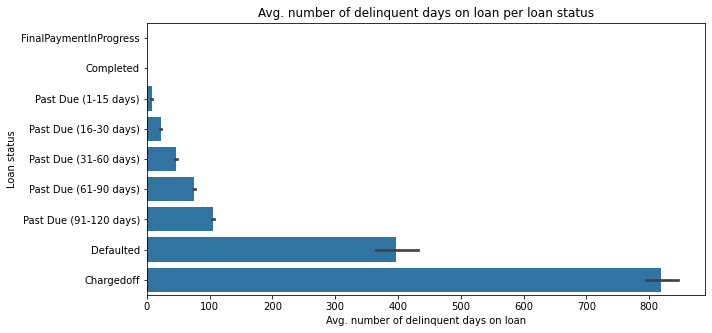

In [105]:
# we will investigate this with a bar plot

plt.figure(figsize=(10,5))

sns.barplot(data=data, x='LoanCurrentDaysDelinquent', y='LoanStatus', color=sns.color_palette()[0])
plt.xlabel("Avg. number of delinquent days on loan")
plt.ylabel("Loan status")
plt.title("Avg. number of delinquent days on loan per loan status")
plt.show()

The plot shows that there seems to be a relationship between these variables as we would expect. Borrowers whose loan status are either `Current`, `Completed`, `FinalPaymentInProgress`, or `Cancelled` were not delinquent on their loans. Those with `Past Due (1-15 days)`, `Past Due (16-30 days)`, `Past Due (31-60 days)`, `Past Due (61-90 days)`, `Past Due (91-120 days)`, `Defaulted`, and `Chargedoff` statuses were delinquent for a number of days with `Chargedoff` having the highest number of delinquent days – an average of more than 1200 days.

##### Which loan term had the most number of defaults?

We will investigate this using a clustered count plot

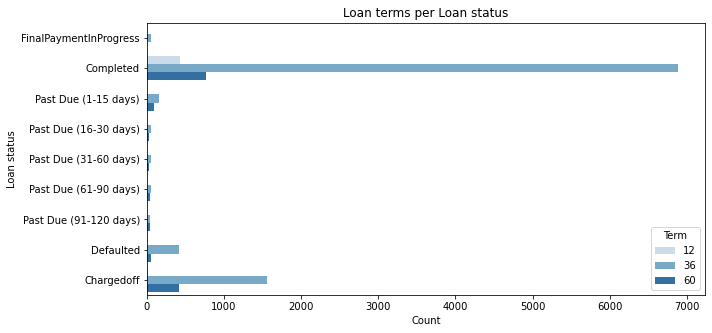

In [106]:
# count plot of loan status by loan term

plt.figure(figsize=(10,5))

sns.countplot(data=data, y= 'LoanStatus', hue = 'Term', palette='Blues')
plt.xlabel("Count")
plt.ylabel("Loan status")
plt.title("Loan terms per Loan status")

plt.show()

From the plot, very few borrowers with a 60-month loan term defaulted or have their loans charged off. None or extremely few borrowers with a 12-month term defaulted. This might be due to the fact that very few borrowers took a 12-month loan. Overall, the trend across each loan term is roughly the same.

##### Is there a relationship between the loan status and the annual percentage rates?

We will investigate this with a box plot.

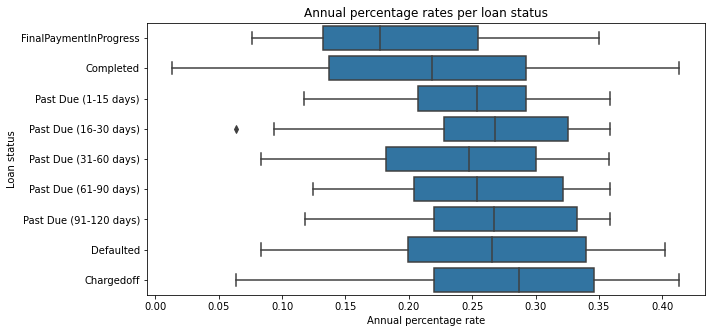

In [107]:
# box plot showing relationship between LoanStatus ans BorrowerAPR

plt.figure(figsize=(10,5))

sns.boxplot(data=data, y='LoanStatus', x='BorrowerAPR', color=sns.color_palette()[0])

plt.xlabel('Annual percentage rate')
plt.ylabel("Loan status")
plt.title("Annual percentage rates per loan status")

plt.show();

From the plot, we see that borrowers whose loans are past due, those that defaulted, and those whose loans were charged off, had higher annual percentage ratings compared to those that had completed their loans. This seems to suggest that the higher the annual percentage rate of the loan the less likely borrowers would be able to complete it.

##### Is there a relationship between the annual percentage rate and the estimated loss on charge-off loans?

We will investigate this with a scatter plot.

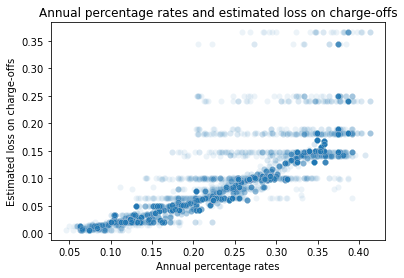

In [108]:
sns.scatterplot(data=data, x='BorrowerAPR',  y='EstimatedLoss', alpha=1/12)

plt.xlabel("Annual percentage rates")
plt.ylabel("Estimated loss on charge-offs")
plt.title("Annual percentage rates and estimated loss on charge-offs")

plt.show();

From the scatter plot, there seems to be a very strong positive relationship between these variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The bivariate analysis shows that borrowers that are delinquent for a long period of time are more likely to default or have their loans charged-off. It also shows that those with a higher annual percentage rate (APR) are more likely to delay, default or have their loans charged-off.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We can see a strong positive relationship between the APR and the estimated loss on charge-off loans. This seems to suggest that the APR, the more likely there will be loses incurred on charge-off loans. This seems to confirm our initial observation that borrowers with higher APRs are more likely to default.

## Multivariate Exploration



> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Is the relationship between the annual percentage rate and the estimated loss consistent for each loan term?

Let's investigate this using a scatter plot faceted by the loan term.

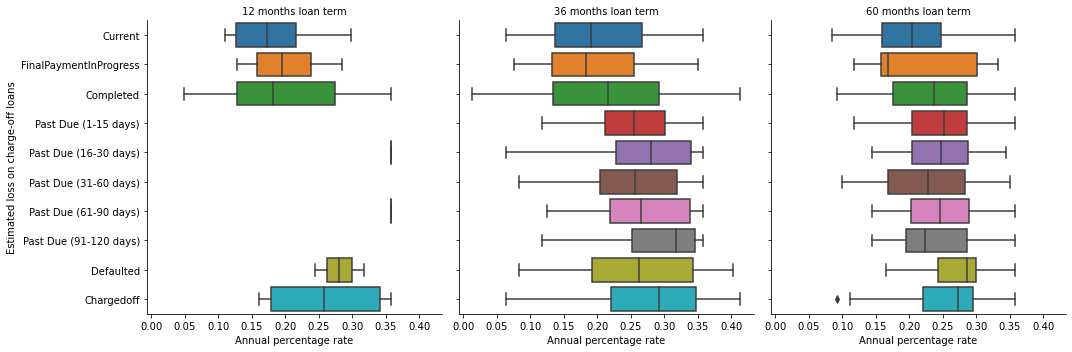

In [74]:
# scatter plot showing the relationship between TotalProsperLoans
# and OnTimeProsperPayments per loan term.
#loans.TotalProsperLoans = loans.TotalProsperLoans.astype(int)

g = sns.catplot(data=data, x='BorrowerAPR', y='LoanStatus', col='Term', col_wrap=3, kind='box')

g.set_xlabels("Annual percentage rate")
g.set_ylabels("Estimated loss on charge-off loans")
g.set_titles(template='{col_name} months loan term')

plt.show();

There seem to be an increase in the strength of the relationship between these two variables. Let's visualize this more clearly with a heatmap.

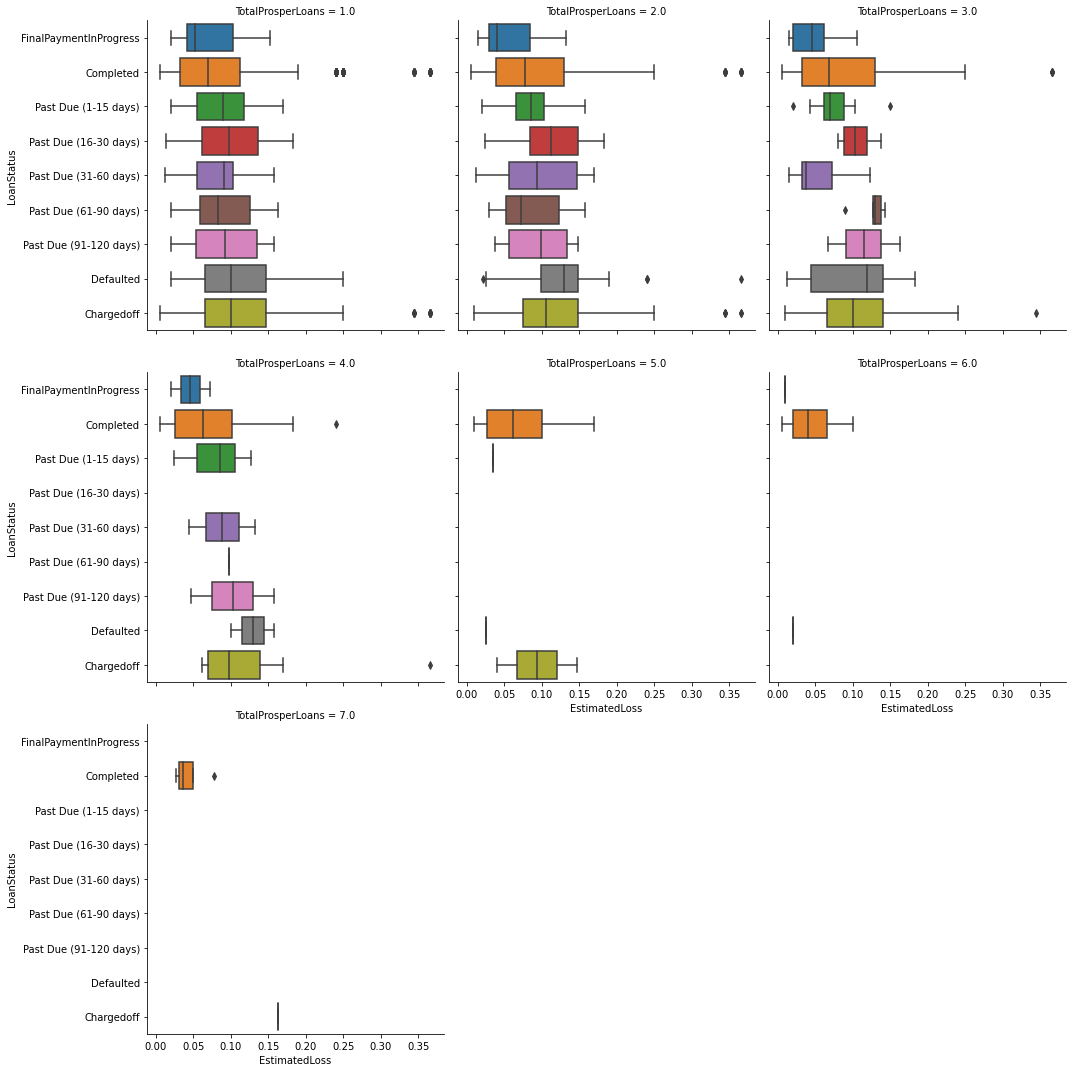

In [109]:
sns.catplot(data=data, x='EstimatedLoss', y='LoanStatus', col='TotalProsperLoans',
 col_wrap=3, kind='box')

In [130]:
data.query('TotalProsperLoans==6')[['LoanStatus', 'MemberKey', 'ProsperPrincipalOutstanding', 'ProsperPrincipalBorrowed']]

,LoanStatus,MemberKey,ProsperPrincipalOutstanding,ProsperPrincipalBorrowed
17422,Completed,DDAE33746410221086D2E02,0.00,38000.0
24078,Completed,7E1733653050264822FAA3D,0.00,23200.0
38667,Completed,E4AF3422677498955FFA00E,0.00,20000.0
40075,Completed,63CA34120866140639431C9,0.02,19600.0
41958,FinalPaymentInProgress,720D3508651090808DC328F,0.01,15940.0
50414,Completed,C45F3365236450678BA344C,4799.68,43900.0
57799,Completed,C70934206057523078260C7,0.01,23000.0
60687,Completed,739C338135235294782AE75,0.03,27565.0
81556,Completed,A833340429888765780A3F0,0.04,31700.0
99389,Completed,16083364744933457E57FB9,0.02,28150.0


In [ ]:
data.query('TotalProsperLoans==6')[['LoanStatus', 'MemberKey', 'ProsperPrincipalOutstanding']]

In [4]:
t = loans.query("MemberKey=='1D13370546739025387B2F4'")[['LoanKey', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
 'MonthlyLoanPayment', 'BorrowerRate', 'BorrowerAPR', 'ProsperPrincipalOutstanding', 
 'LP_NetPrincipalLoss', 'LP_GrossPrincipalLoss', 'LoanCurrentDaysDelinquent',
 'LoanOriginalAmount', 'Investors',
'TotalProsperLoans', 'LoanStatus', 'InvestmentFromFriendsCount', 'LoanOriginationDate', 'ClosedDate']]

t.TotalProsperLoans = t.TotalProsperLoans.fillna(0)
t.sort_values('TotalProsperLoans')

,LoanKey,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,ProsperPrincipalOutstanding,LP_NetPrincipalLoss,LP_GrossPrincipalLoss,LoanCurrentDaysDelinquent,LoanOriginalAmount,Investors,TotalProsperLoans,LoanStatus,InvestmentFromFriendsCount,LoanOriginationDate,ClosedDate
1,9E3B37071505919926B1D82,0.0,0.0,0.0,0.0,318.93,0.092,0.12016,NaN,0.0,0.0,0,10000,1,0.0,Current,0,2014-03-03,NaT


In [135]:
t = loans.query("MemberKey=='B4A9342073073199748BAF2'")[['TotalProsperLoans', 
'CurrentCreditLines', 'Term', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'ProsperPaymentsLessThanOneMonthLate',
'DebtToIncomeRatio','ProsperPaymentsOneMonthPlusLate', 'ListingCategory (numeric)',
'DelinquenciesLast7Years', 'CurrentDelinquencies', 'OnTimeProsperPayments', 'ScorexChangeAtTimeOfListing']]
t.TotalProsperLoans = t.TotalProsperLoans.fillna(0)
t.sort_values('TotalProsperLoans')

,TotalProsperLoans,CurrentCreditLines,Term,EmploymentStatusDuration,StatedMonthlyIncome,ProsperPaymentsLessThanOneMonthLate,DebtToIncomeRatio,ProsperPaymentsOneMonthPlusLate,ListingCategory (numeric),DelinquenciesLast7Years,CurrentDelinquencies,OnTimeProsperPayments,ScorexChangeAtTimeOfListing
31266,0.0,14.0,36,296.0,3672.166667,NaN,0.51,NaN,7,5.0,0.0,NaN,NaN
94705,1.0,15.0,36,311.0,3814.250000,1.0,0.33,0.0,7,5.0,0.0,14.0,52.0


In [137]:
t = loans.query("MemberKey=='B4A9342073073199748BAF2'")[['TotalProsperLoans', 'IncomeRange','CreditScoreRangeLower', 
'CreditScoreRangeUpper', 'BankcardUtilization', 'AvailableBankcardCredit', 'DateCreditPulled', 'OpenRevolvingAccounts']]
t.TotalProsperLoans = t.TotalProsperLoans.fillna(0)
t.sort_values('TotalProsperLoans')

,TotalProsperLoans,IncomeRange,CreditScoreRangeLower,CreditScoreRangeUpper,BankcardUtilization,AvailableBankcardCredit,DateCreditPulled,OpenRevolvingAccounts
31266,0.0,"$25,000-49,999",620.0,639.0,1.09,0.0,2008-07-04 19:12:04.890,7
94705,1.0,"$25,000-49,999",680.0,699.0,0.00,0.0,2009-10-02 22:44:06.000,4


In [149]:
loans[['LP_ServiceFees', 'BorrowerAPR']].corr()

,LP_ServiceFees,BorrowerAPR
LP_ServiceFees,1.000000,0.116974
BorrowerAPR,0.116974,1.000000


In [239]:
loans.query('LoanStatus == "Current"')['MemberKey'].sample(5)

62622    223F34092073539929E0D8A
5933     5FD435461621855259AA648
49785    BE6137035516830565061B6
41996    61E13693705695406C5EF9B
39580    90C3369475288990194B863
Name: MemberKey, dtype: object

In [3]:
loans.query('(LoanStatus == "Current")')[['TotalProsperLoans', 'MemberKey']]

,TotalProsperLoans,MemberKey
1,NaN,1D13370546739025387B2F4
3,NaN,9ADE356069835475068C6D2
4,1.0,36CE356043264555721F06C
5,NaN,874A3701157341738DE458F
6,NaN,AA4535764146102879D5959
...,...,...
113930,1.0,89A735620041442181964DB
113931,NaN,FC303703545561711E2CDC9
113932,NaN,2EC435768441332602FDC15
113934,NaN,0FE0370029359765342FDB5


In [82]:
loans.query('ListingCreationDate >= "2014-01-01"')['ListingCreationDate'] + 

2014-03-10 12:20:53.760    1
2014-03-10 11:28:06.920    1
2014-03-10 10:25:51.877    1
2014-03-10 07:33:30.033    1
2014-03-10 06:47:15.370    1
                          ..
2014-01-01 06:52:36.703    1
2014-01-01 06:50:20.193    1
2014-01-01 06:35:30.343    1
2014-01-01 06:15:19.590    1
2014-01-01 05:27:29.967    1
Name: ListingCreationDate, Length: 10485, dtype: int64

In [80]:
loans.ListingCreationDate.head()

0   2007-08-26 19:09:29.263
1   2014-02-27 08:28:07.900
2   2007-01-05 15:00:47.090
3   2012-10-22 11:02:35.010
4   2013-09-14 18:38:39.097
Name: ListingCreationDate, dtype: datetime64[ns]

In [127]:
loans.query("LoanStatus == 'Defaulted'")['LoanCurrentDaysDelinquent'].value_counts().sort_index(ascending=False)

2421    1
2362    1
2351    1
2344    1
2311    1
       ..
23      1
18      1
16      1
3       1
1       1
Name: LoanCurrentDaysDelinquent, Length: 1278, dtype: int64

In [133]:
loans.query('LoanStatus == "Defaulted"').query('LoanCurrentDaysDelinquent==3')[['MemberKey']]

,MemberKey
94705,B4A9342073073199748BAF2


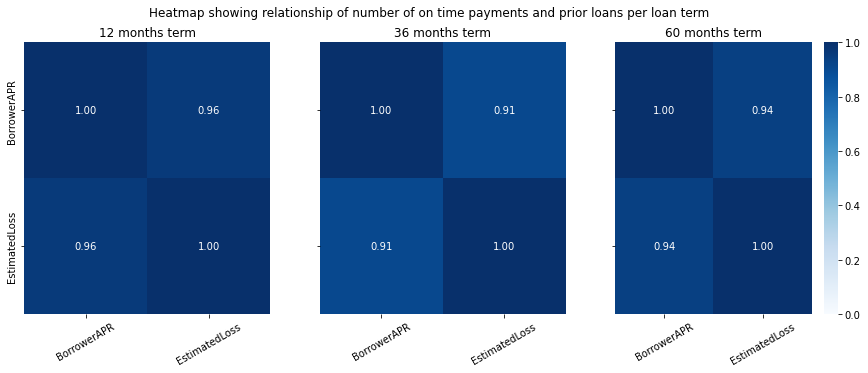

In [78]:
# the pearson-r coefficient of TotalProsperLoans and OnTimeProsperPayments grouped by Term

term1 = data.query('Term==12')[['BorrowerAPR', 'EstimatedLoss']].corr()
term2 = data.query('Term==36')[['BorrowerAPR', 'EstimatedLoss']].corr()
term3 = data.query('Term==60')[['BorrowerAPR', 'EstimatedLoss']].corr()

fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)

ax1 = sns.heatmap(data=term1, annot=True, fmt='.2f', cmap="Blues",
                      vmin=0, vmax=1, cbar=False, ax=axes[0])
ax2 = sns.heatmap(data=term2, annot=True, fmt='.2f', cmap="Blues", 
                      vmin=0, vmax=1, cbar=False, ax=axes[1])
ax3 = sns.heatmap(data=term3, annot=True, fmt='.2f', cmap="Blues",
                      vmin=0, vmax=1, ax=axes[2])

ax1.set_title("12 months term")
ax1.set_xticklabels(['BorrowerAPR', 'EstimatedLoss'], rotation=30)
ax2.set_title("36 months term")
ax2.set_xticklabels(['BorrowerAPR', 'EstimatedLoss'], rotation=30)
ax3.set_title("60 months term")
ax3.set_xticklabels(['BorrowerAPR', 'EstimatedLoss'], rotation=30)
fig.suptitle("Heatmap showing relationship of number of on time payments and prior loans per loan term")

plt.show()

The heatmap per loan terms confirms that there is a slight increase in the strength of the relationship of the number of on time payments and the number of prior loans. From these plots, it seems that borrowers that have prior loans are more likely to make on time payments as the term of the loan increases.

In the bivariate section, the box plot of the annual percentage rates (APR) and the loan status reveals that borrowers with a higher APR are more likely to default or have their loans charged-off. Let's see if this is the trend for each loan term.

##### Is there a trend in the relationship between the loan status and the annual percentage rates for each loan term?

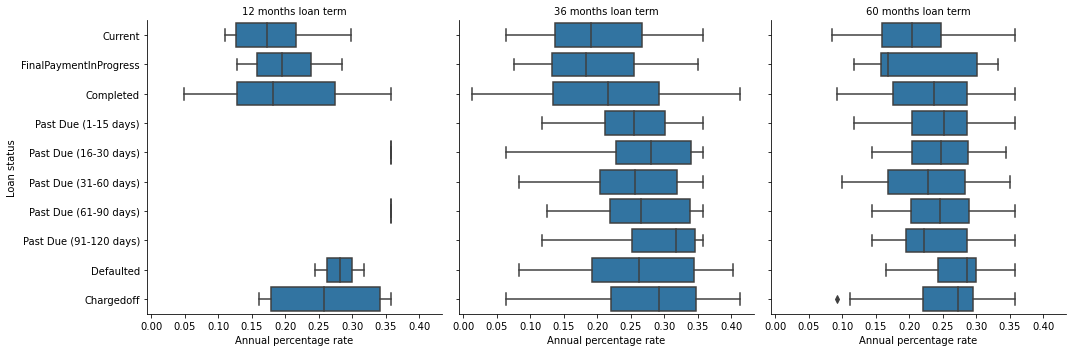

In [75]:
# box plot of LoanStatus and BorrowerAPR faceted by Term

g = sns.catplot(data=data, y='LoanStatus', x='BorrowerAPR', color=sns.color_palette()[0],
                col='Term', kind='box' )

g.figure.set_size_inches((15,5))

g.set_xlabels("Annual percentage rate")
g.set_ylabels("Loan status")
g.set_titles(template='{col_name} months loan term')

plt.show();

The above plot shows that this seems to be the trend for each loan term. As we can see, borrowers that default or have their loans charged off have a much higher annual percentage rate compared to those that completed their loans.

Also, in the bivariate section, the bar plot of the number of days delinquent on current loans and the loan status seem to show that the more the number of days a borrower is delinquent, the more likely they will default or have their loans charged-off. Let's see if this is a trend across each loan term.

##### Is there a relationship between the number of days delinquent on current loans and the loan status for across each loan term?

We will investigate this using a bar plot faceted by the loan term with the x-axis containing the mean number of days borrowers were delinquent, and the y-axis the loan status.

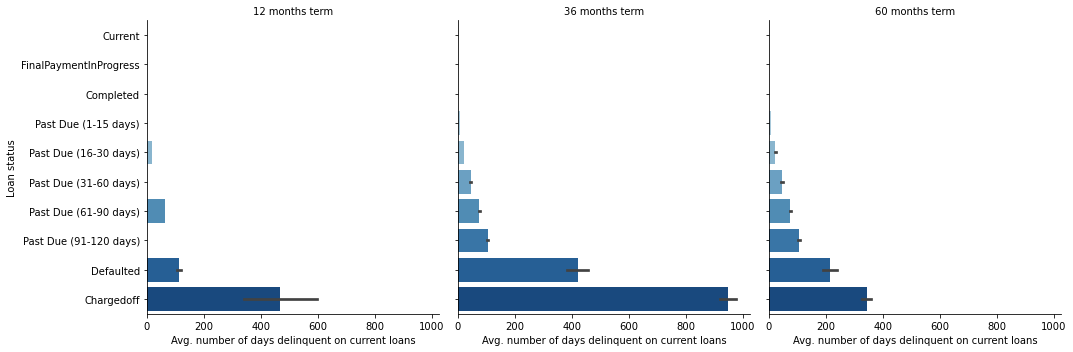

In [76]:
# faceted plot of LoanCurrentDaysDelinquent and LoanStatus on Term

g = sns.catplot(data=data, x='LoanCurrentDaysDelinquent', y='LoanStatus', col='Term',
         palette='Blues', kind='bar')

g.set_titles(template='{col_name} months term')
g.set_xlabels('Avg. number of days delinquent on current loans')
g.set_ylabels('Loan status')

plt.show();

The plot shows that this is a trend for each loan term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

